In [16]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Previewing the data

In [17]:
df=pd.read_csv('winequality-red.csv',sep=';') #Loading data
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 # describing numerical features(mean ,max,min etc)

In [18]:
print(df.shape) #shape of data
print(df.describe()) # describing numerical features(mean ,max,min etc)

(1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.0000

##  Pairplot of dataset and last column showing comparision with quality

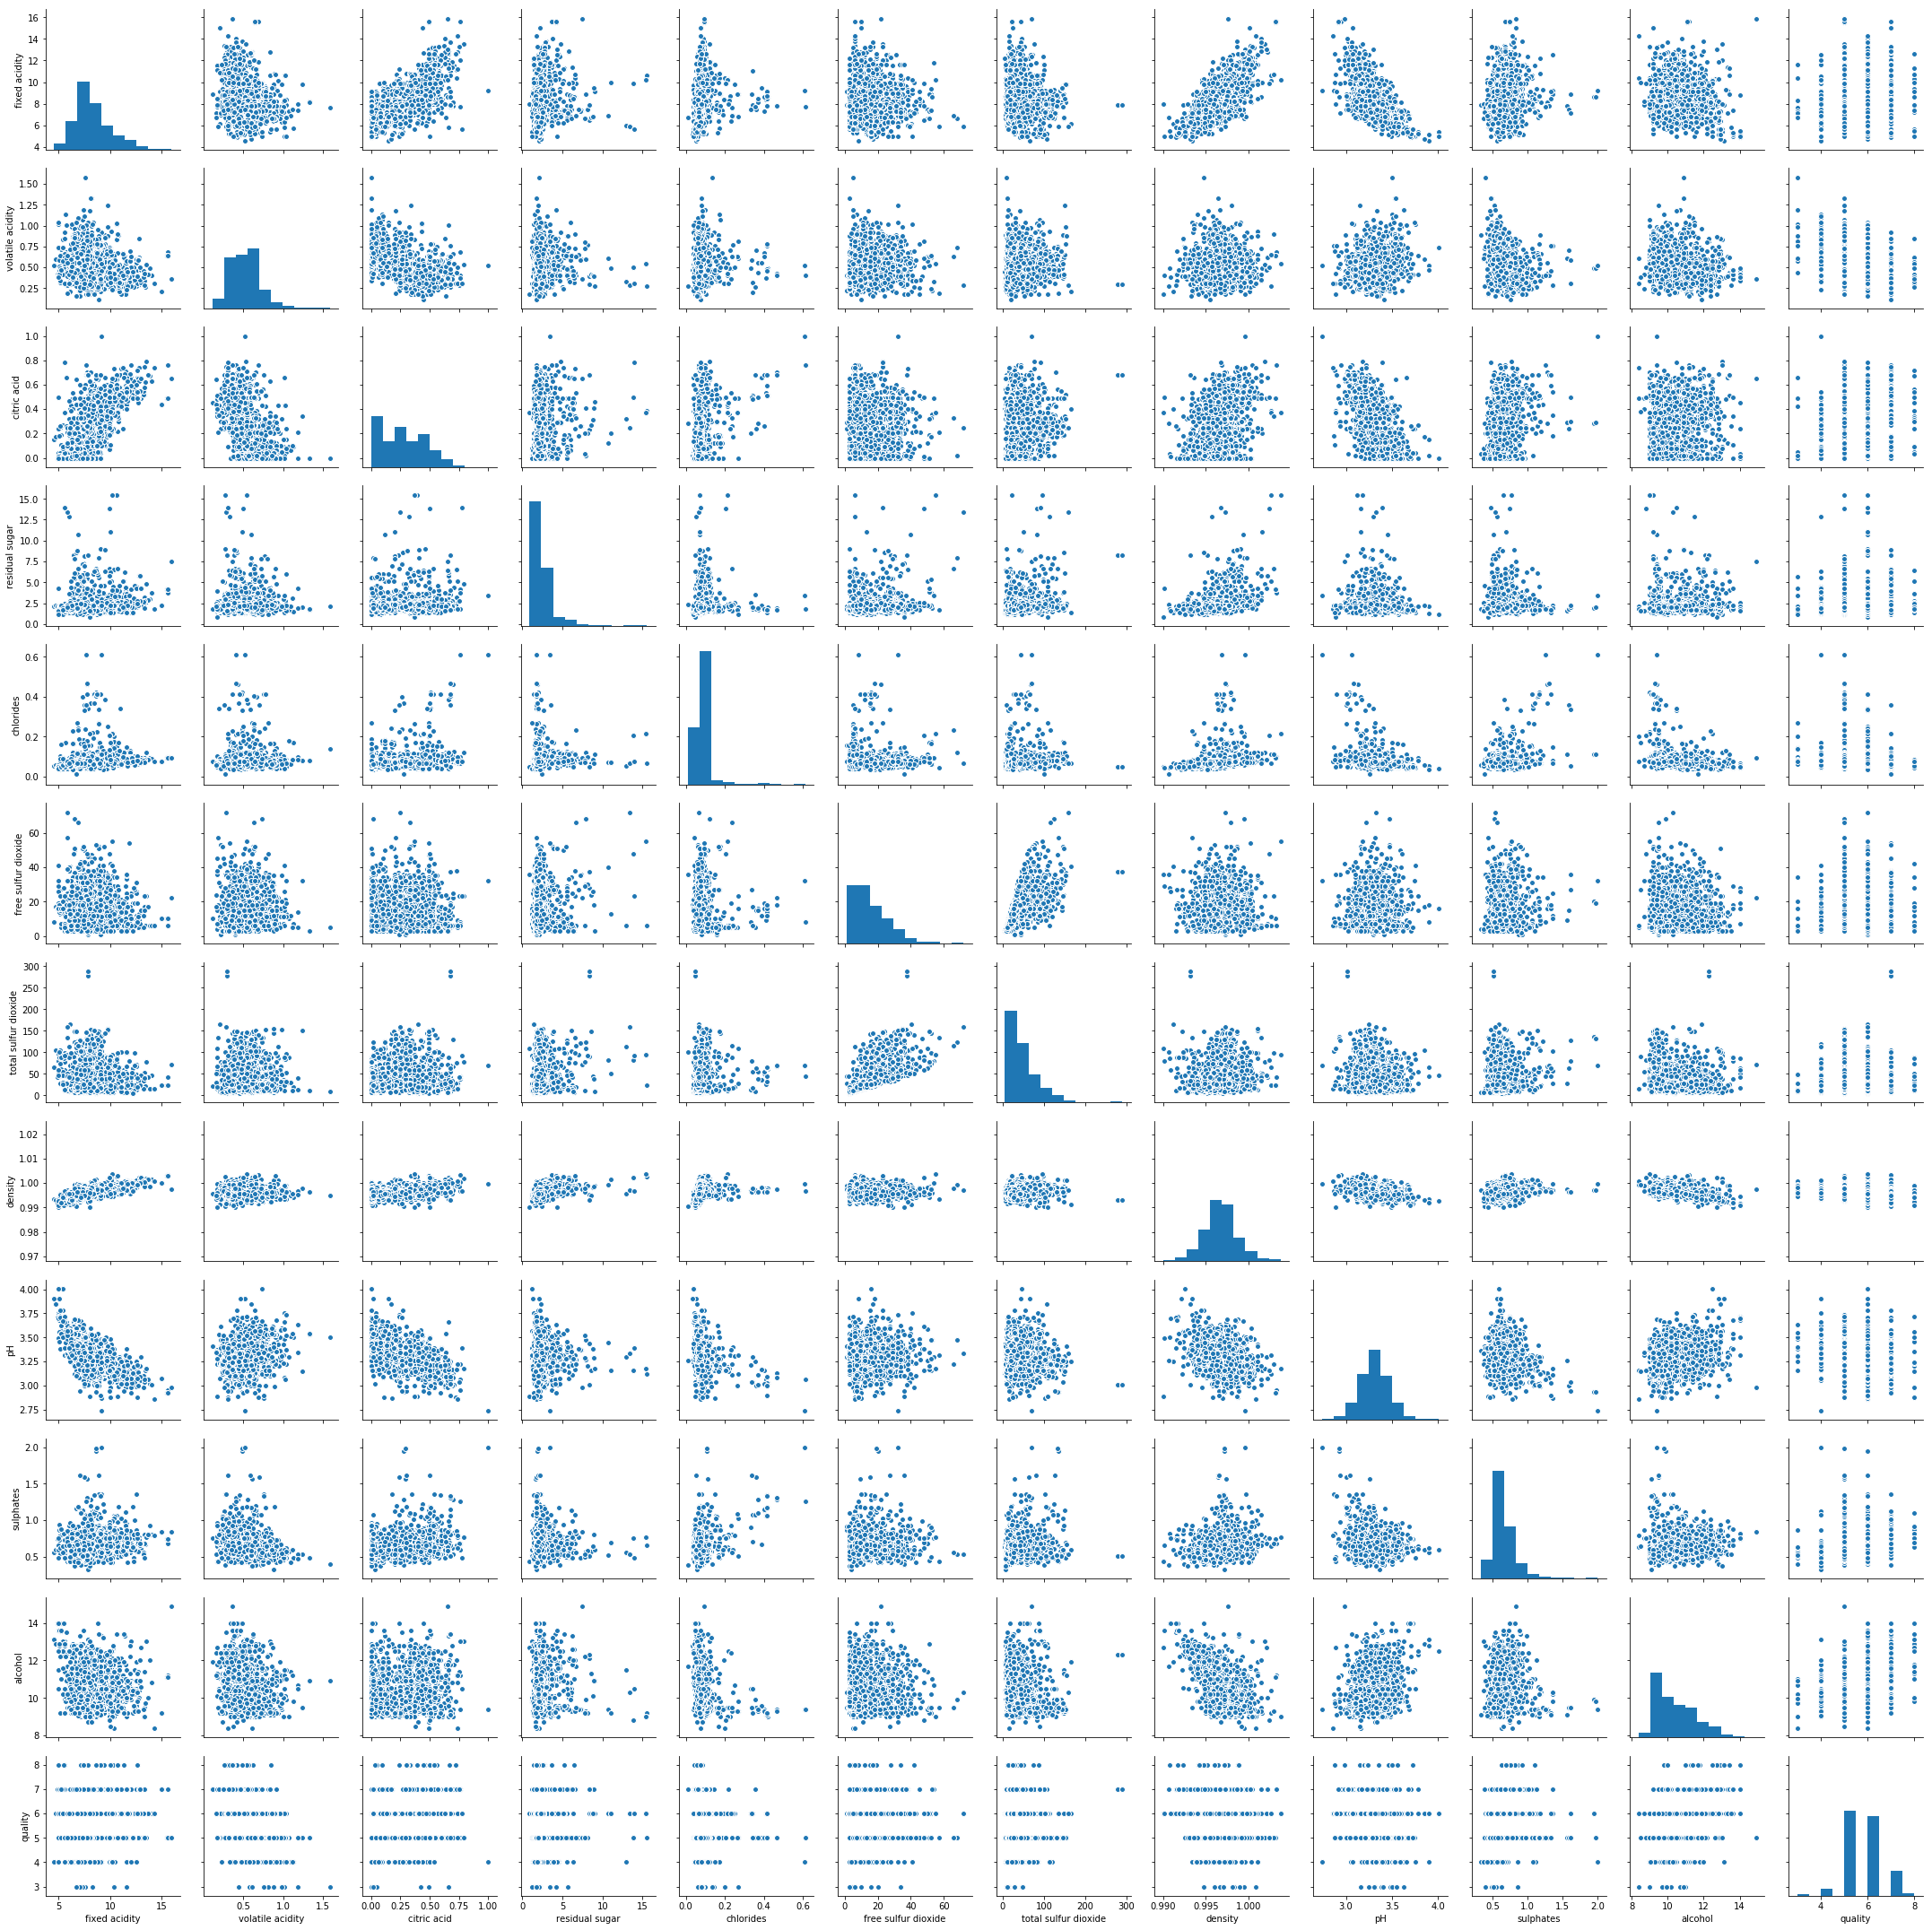

In [19]:
sns.pairplot(df)

## Fixed acidity vs quality

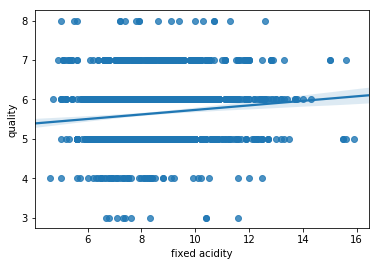

In [20]:
sns.regplot(df['fixed acidity'],df['quality'])

## Volatile acidity vs quality

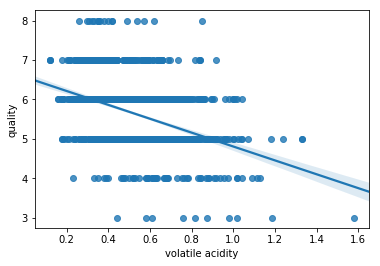

In [21]:
sns.regplot(df['volatile acidity'],df['quality'])

## citric acid vs quality

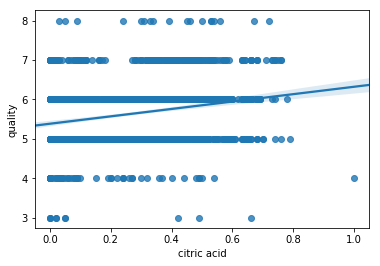

In [22]:
sns.regplot(df['citric acid'],df['quality'])

## residual sugar vs quality

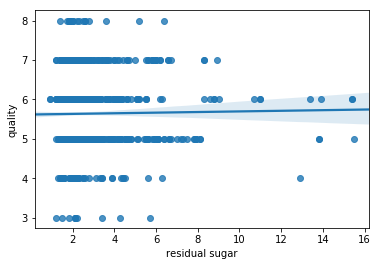

In [23]:
sns.regplot(df['residual sugar'],df['quality'])

## chlorides vs quality

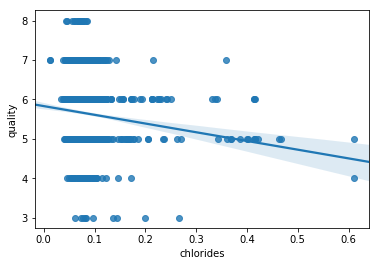

In [24]:
sns.regplot(df['chlorides'],df['quality'])

## free sulphur dioxide vs quality

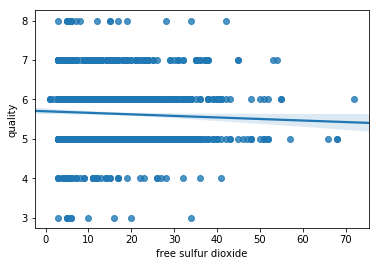

In [25]:
sns.regplot(df['free sulfur dioxide'],df['quality'])

## total sulphur dioxide vs quality

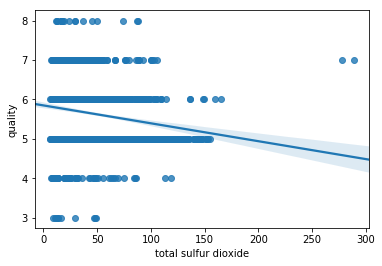

In [26]:
sns.regplot(df['total sulfur dioxide'],df['quality'])

## density vs quality

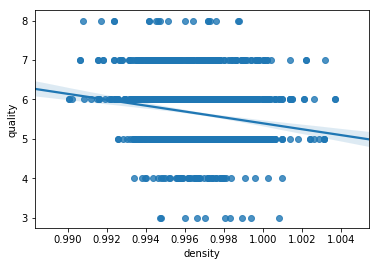

In [27]:
sns.regplot(df['density'],df['quality'])

## pH vs quality

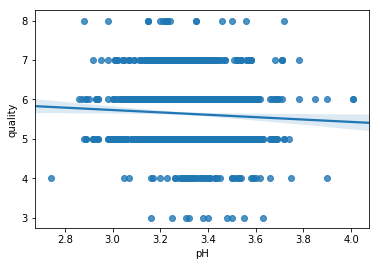

In [28]:
sns.regplot(df['pH'],df['quality'])

## suphates vs quality

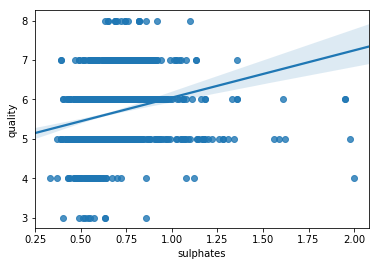

In [29]:
sns.regplot(df['sulphates'],df['quality'])

## alcohol vs quality

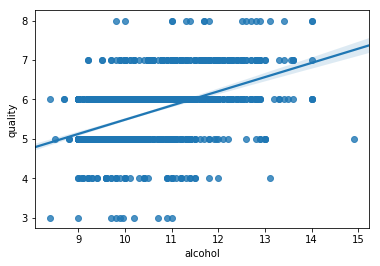

In [30]:
sns.regplot(df['alcohol'],df['quality'])

## plotting the heatmap

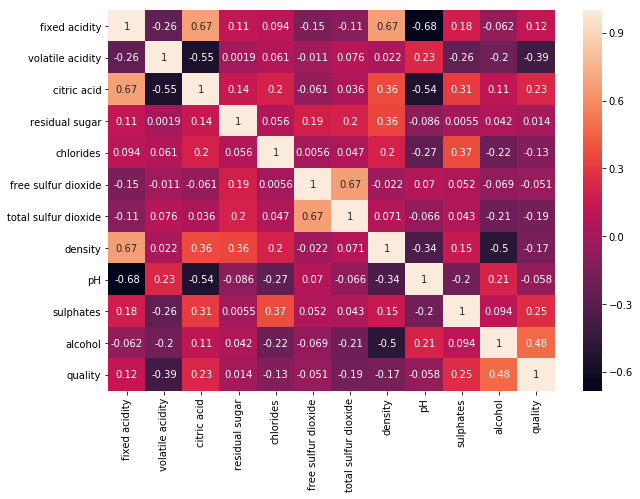

In [31]:

plt.figure(figsize=(10,7))
corr=df.corr()
sns.heatmap(corr,annot=True)

## Separating the output

In [32]:
y=df.quality # Separating the output
y.head() # Preview the output

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Dropping the output

In [33]:
X=df.drop('quality',axis=1) #Dropping the output

In [34]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [35]:
X.shape 

(1599, 11)

## initializing weight bias and learning rate

In [74]:
alpha=0.00005 #(Learning Rate)
w=np.random.rand(1,11)*10 #(Weight Vector/Theta parameter)
b=np.random.rand(1)*10 
print(w)
print(b)

[[6.70977162 1.87819338 1.22028305 3.45372022 3.90702193 2.25342608
  8.15128017 5.08590014 6.31448234 5.37968075 9.10024213]]
[7.36397119]


## Extracting no. of training set

In [75]:
X=np.array(X)# (Converting X to array form)
m=len(X)
print(m) #(m= No. of Training Sets)

1599


In [76]:
X.shape
y=np.array(y)
y.shape
print(b)

[7.36397119]


## Implementing linear regression

In [200]:
for i in range(3000): #(1000 iterations of Gradient Descent)
    pred=np.dot(w,X.T)+b #(Prediction Vector)
    J=(1/(2*m))*(np.sum(pred-y)**2) #(Cost Function)
    print (J) #printing cost function after each iteration to see whether it's decreasing or not
    dw=np.dot((pred-y.T),X) #(Result after partial differentiation W.r.t. W)
    db=np.sum(pred-y)       #(Result after partial differentiation W.r.t. W)
    w=w-alpha*(1/m)*np.dot((pred-y.T),X) #(Weight Vector updated)
    b=b-alpha*np.sum(pred-y)*(1/m)

1.7061902724721723
1.70617251049831
1.7061547487236441
1.7061369871481986
1.7061192257719482
1.7061014645948582
1.706083703616939
1.7060659428382765
1.7060481822587417
1.706030421878404
1.7060126616972193
1.705994901715151
1.7059771419323115
1.705959382348607
1.7059416229640596
1.7059238637787093
1.7059061047924757
1.7058883460054737
1.7058705874175926
1.705852829028864
1.7058350708392884
1.7058173128488459
1.7057995550575398
1.7057817974653993
1.7057640400723912
1.7057462828785594
1.7057285258838017
1.705710769088211
1.705693012491843
1.7056752560945538
1.7056574998963387
1.7056397438972524
1.7056219880973915
1.7056042324965994
1.705586477094931
1.7055687218923612
1.7055509668888726
1.7055332120844748
1.705515457479252
1.7054977030730851
1.7054799488660417
1.7054621948581095
1.7054444410493312
1.7054266874395718
1.7054089340289065
1.7053911808173918
1.7053734278049275
1.705355674991562
1.7053379223772798
1.7053201699621003
1.705302417745942
1.7052846657289116
1.7052669139109187
1.7052

1.689124701431465
1.6891071307986756
1.6890895603628318
1.6890719901239
1.6890544200819326
1.6890368502369493
1.689019280588926
1.689001711137824
1.6889841418836822
1.6889665728264585
1.6889490039662418
1.6889314353029983
1.6889138668366528
1.6888962985671925
1.6888787304947437
1.6888611626191579
1.688843594940517
1.6888260274587583
1.6888084601739464
1.688790893086055
1.6887733261951237
1.6887557595010814
1.68873819300401
1.6887206267037667
1.6887030606004754
1.6886854946940313
1.6886679289845707
1.6886503634720182
1.6886327981563194
1.688615233037538
1.6885976681156418
1.6885801033906336
1.688562538862545
1.68854497453131
1.688527410396988
1.6885098464595762
1.6884922827189737
1.6884747191752207
1.688457155828436
1.6884395926784983
1.6884220297254173
1.6884044669691955
1.6883869044098596
1.6883693420474029
1.6883517798818237
1.688334217913135
1.6883166561412655
1.6882990945662433
1.6882815331880954
1.6882639720067663
1.6882464110222464
1.6882288502346476
1.688211289643864
1.688193729

1.6712177574509426
1.671200387501018
1.671183017745793
1.6711656481851027
1.6711482788191019
1.6711309096476878
1.671113540670852
1.6710961718886648
1.6710788033010673
1.6710614349080584
1.671044066709658
1.6710266987058757
1.6710093308966791
1.6709919632820835
1.670974595862088
1.6709572286366492
1.670939861605805
1.670922494769514
1.6709051281278628
1.6708877616807822
1.6708703954282833
1.6708530293703372
1.6708356635069637
1.6708182978381676
1.6708009323639814
1.6707835670843212
1.670766201999235
1.6707488371087225
1.6707314724128013
1.6707141079113728
1.670696743604498
1.6706793794922132
1.6706620155744625
1.6706446518512403
1.670627288322584
1.670609924988466
1.6705925618489164
1.670575198903897
1.670557836153382
1.6705404735974059
1.6705231112359897
1.6705057490690665
1.6704883870966967
1.6704710253188615
1.6704536637355272
1.670436302346725
1.6704189411524348
1.6704015801526615
1.670384219347381
1.6703668587366483
1.670349498320456
1.6703321380987188
1.6703147780715146
1.6702974

1.654460026836722
1.6544428446042616
1.654425662564267
1.6544084807166963
1.6543912990614893
1.6543741175987523
1.6543569363284585
1.6543397552505386
1.654322574365092
1.6543053936720227
1.654288213171334
1.6542710328630892
1.6542538527472135
1.6542366728237767
1.6542194930927125
1.6542023135540658
1.6541851342078202
1.654167955054011
1.6541507760925411
1.6541335973235178
1.6541164187468738
1.65409924036263
1.6540820621707562
1.6540648841712156
1.6540477063640524
1.6540305287493415
1.6540133513269852
1.6539961740969424
1.6539789970593042
1.6539618202140336
1.653944643561166
1.6539274671006383
1.6539102908324876
1.6538931147566396
1.653875938873209
1.6538587631821202
1.6538415876834156
1.6538244123770436
1.6538072372629575


## printing weight, bias, predicted values and cost function 

In [138]:
print(b) # Final value of b
print(w) # Final value of weight vector
print(pred) # Final Predicted values
print(J) # Final value of Cost function

[5.96081522]
[[-3.58134069e-01  6.87699416e-01  1.31052195e+00  2.75578942e-02
   3.65986529e+00  1.25343910e-03 -1.80348441e-02  3.68506494e+00
   1.38197203e+00  4.26676616e+00 -8.25025436e-01]]
[[6.68496805 5.93760303 6.05484542 ... 6.40266033 7.24100047 6.34477535]]
6.940308408416607


In [139]:
 print(pred.shape)

(1, 1599)


In [140]:
print(y.shape)

(1599,)


# Comparing prediction and features

## alcohol vs prediction

(0, 12)

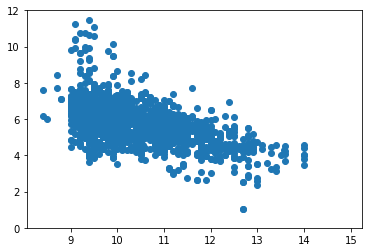

In [141]:
plt.scatter(x=df['alcohol'],y=pred)
plt.ylim(0,12)

## density vs prediction

(0.99, 1.005)

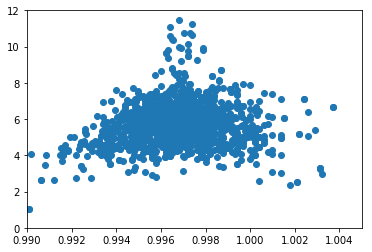

In [142]:
plt.scatter(x=df['density'],y=pred)
plt.ylim(0,12)
plt.xlim(0.99,1.005)

## sulphates vs prediction

(0, 12)

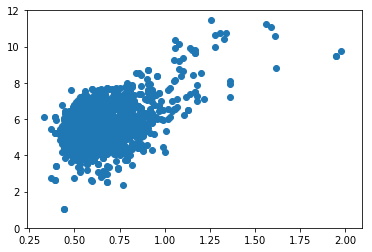

In [143]:
plt.scatter(x=df['sulphates'],y=pred)
plt.ylim(0,12)

## pH vs prediction

(0, 12)

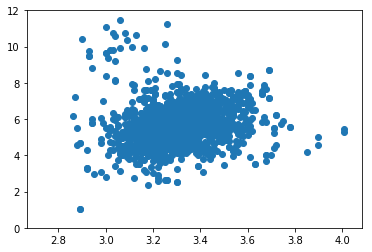

In [144]:
plt.scatter(x=df['pH'],y=pred)
plt.ylim(0,12)

## fixed acidity vs prediction

(0, 12)

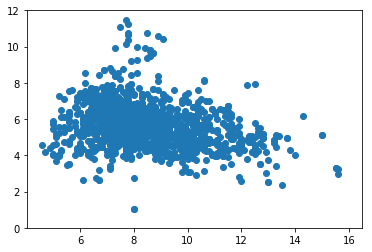

In [145]:
plt.scatter(x=df['fixed acidity'],y=pred)
plt.ylim(0,12)

## volatile acidity vs prediction

(0, 12)

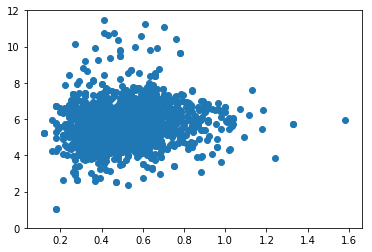

In [146]:
plt.scatter(x=df['volatile acidity'],y=pred)
plt.ylim(0,12)

## citric acid vs prediction

(0, 0.8)

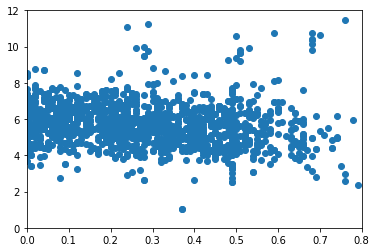

In [147]:
plt.scatter(x=df['citric acid'],y=pred)
plt.ylim(0,12)
plt.xlim(0,0.8)

## chlorides vs prediction

(0, 0.3)

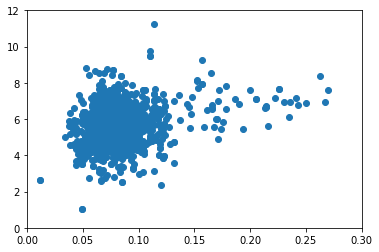

In [148]:
plt.scatter(x=df['chlorides'],y=pred)
plt.ylim(0,12)
plt.xlim(0,0.3)

## residual sugar vs predition

(0, 6)

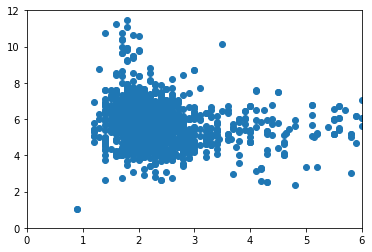

In [149]:
plt.scatter(x=df['residual sugar'],y=pred)
plt.ylim(0,12)
plt.xlim(0,6)

## free sulphur dioxide vs prediction

(0, 50)

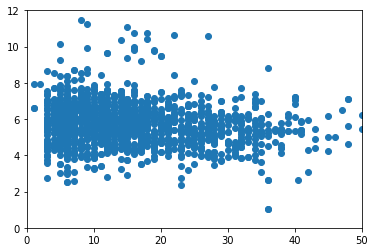

In [150]:
plt.scatter(x=df['free sulfur dioxide'],y=pred)
plt.ylim(0,12)
plt.xlim(0,50)

## total sulphur dioxide vs prediction

TypeError: title() missing 1 required positional argument: 's'

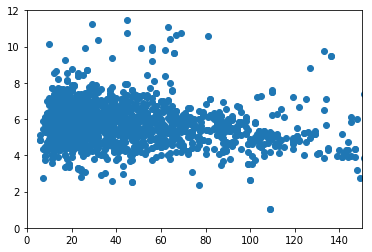

In [151]:
plt.scatter(x=df['total sulfur dioxide'],y=pred)
plt.ylim(0,12)
plt.xlim(0,150)
plt.title()

## actual quality vs prediction

(0, 12)

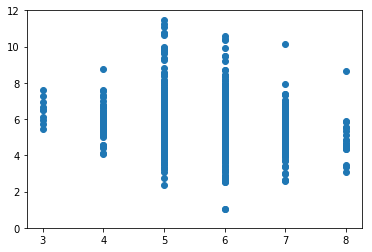

In [152]:
plt.scatter(x=y,y=pred)
plt.ylim(0,12)

In [201]:
def Rsq(y,yhat):
    SST = np.sum((y-y.mean())**2)
    SSReg = np.sum((yhat-y.mean())**2)
    return  (SSReg/SST)

In [202]:
print (Rsq(y,pred))

0.9939004606005167
